In [13]:
import pandas as pd
import numpy as np

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
data = pd.read_csv('telecom_churn.csv')

In [16]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [17]:
data.drop(['State', 'Voice mail plan'], axis = 1, inplace = True)

In [18]:
data['International plan'] = data['International plan'].map({'Yes': 1, 'No': 0})

In [19]:
data.head()

,Account length,Area code,International plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null int64
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64
Churn                     3333 non-null bool
dtypes: bool(1), float64(8), int64(9)
memory usage

In [21]:
y = data['Churn'].astype('int')

In [22]:
X = data.drop('Churn', axis = 1)

In [23]:
X.shape, y.shape

((3333, 17), (3333,))

In [24]:
from sklearn.model_selection import train_test_split, cross_val_score

In [25]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state = 17)

In [26]:
X_train.shape

(2333, 17)

In [27]:
X_valid.shape

(1000, 17)

In [28]:
first_tree = DecisionTreeClassifier(random_state = 17)

In [29]:
np.mean(cross_val_score(first_tree, X_train, y_train, cv=5))

0.9138423504976518

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
first_knn = KNeighborsClassifier()

In [32]:
np.mean(cross_val_score(first_knn, X_train, y_train, cv=5))

0.8671274043984523

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
tree_params = {'max_depth': np.arange(1, 11), 'max_features':[.5, .7, 1]}

In [35]:
tree_grid = GridSearchCV(first_tree, tree_params, cv=5, n_jobs=-1)

In [36]:
%%time
tree_grid.fit(X_train, y_train)

CPU times: user 375 ms, sys: 68.6 ms, total: 443 ms
Wall time: 2.63 s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=17,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'max_features': [0.5, 0.7, 1

In [37]:
tree_grid.best_score_, tree_grid.best_params_

(0.9391341620231461, {'max_depth': 6, 'max_features': 0.7})

In [38]:
knn_params = {'n_neighbors': range(5, 30, 5) }

In [39]:
knn_grid = GridSearchCV(first_knn, knn_params, cv = 5)

In [40]:
%%time
knn_grid.fit(X_train, y_train)

CPU times: user 503 ms, sys: 2.92 ms, total: 506 ms
Wall time: 506 ms


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': range(5, 30, 5)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [41]:
knn_grid.best_params_, knn_grid.best_score_

({'n_neighbors': 10}, 0.8701243034719246)

In [42]:
tree_grid.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=0.7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=17, splitter='best')

In [43]:
tree_valid_pred = tree_grid.predict(X_valid)

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
accuracy_score(y_valid, tree_valid_pred)

0.936

In [46]:
1 - np.mean(y)

0.8550855085508551

In [47]:
from sklearn.tree import export_graphviz

In [48]:
export_graphviz(tree_grid.best_estimator_, out_file='telecom_tree.dot', feature_names=X.columns, filled=True)

In [49]:
!ls -l *.dot

-rw-r--r-- 1 kamilla kamilla 1691 Мау 24 10:51 diamond.dot
-rw-r--r-- 1 kamilla kamilla 7921 Мау 27 22:06 telecom_tree.dot


In [50]:
!dot -Tpng telecom_tree.dot -o telecom_tree.png

In [51]:
from IPython.display import Image

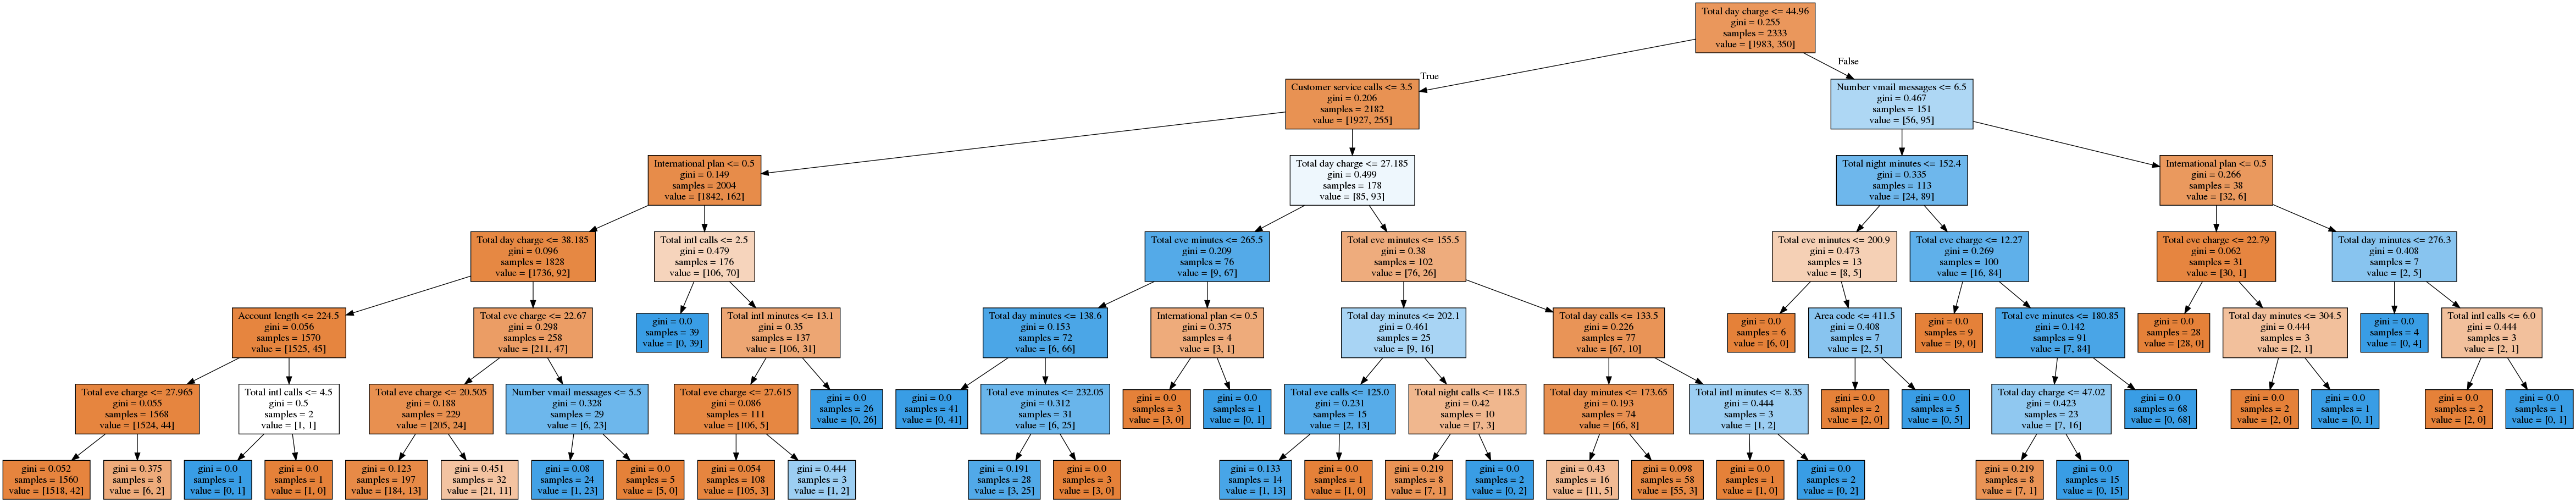

In [52]:
Image("telecom_tree.png")

In [53]:
second_tree = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)

In [56]:
second_tree_pred = second_tree.predict(X_valid)

In [57]:
accuracy_score(second_tree_pred, y_valid)

0.905

In [58]:
export_graphviz(second_tree, out_file='telecom_tree2.dot', feature_names=X.columns, filled=True)

In [59]:
!ls -l *.dot

-rw-r--r-- 1 kamilla kamilla 1691 Мау 24 10:51 diamond.dot
-rw-r--r-- 1 kamilla kamilla 1730 Мау 27 22:12 telecom_tree2.dot
-rw-r--r-- 1 kamilla kamilla 7921 Мау 27 22:06 telecom_tree.dot


In [60]:
!dot -Tpng telecom_tree2.dot -o telecom_tree2.png

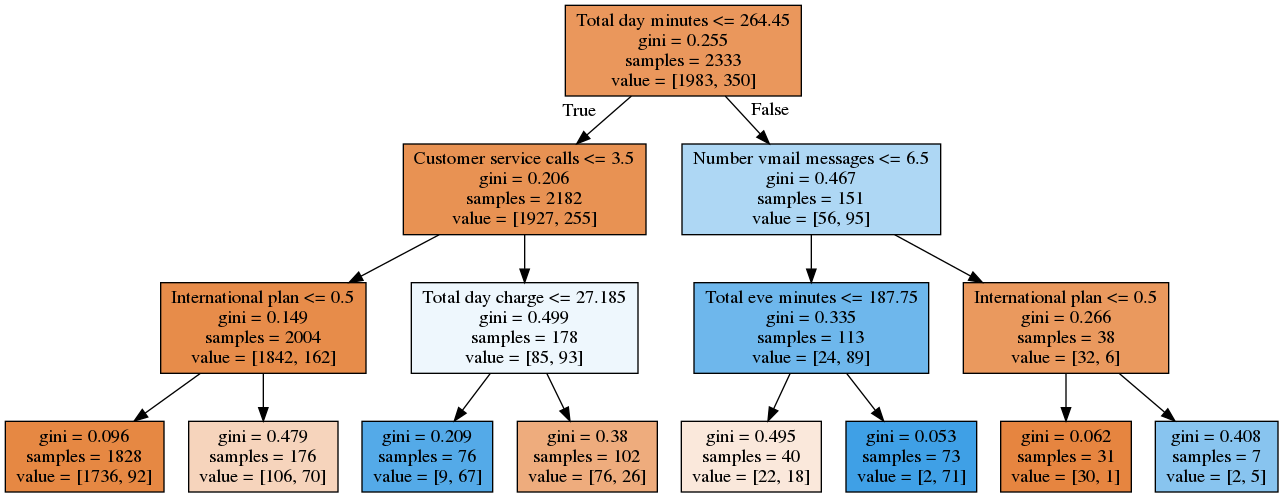

In [61]:
Image("telecom_tree2.png")